# Homework Assignment for Master IASD Course on Differential Privacy for Machine Learning

Due by March 12, 23h00

### Instructions

- Your final submission should be in the form of a [Colab notebook](https://colab.research.google.com/), of which the file that you are currently viewing is an example. 
- Once you have this homework file open in your browser, you can make a personal copy of it in your Google Drive by going to "File -> Save a copy in Drive". In order to do this, you will need to have a Google account. 
- Once you have a copy of this Colab notebook on your Google account, you can go through the questions and fill in your answers. 
- Your code should be in the specified code blocks corresponding to each question. Please comment your code generously to help with the evaluation.
- In addition to your code, you may create new Markdown blocks to add explanation of your answers or code. You can refer to this [link](https://colab.research.google.com/notebooks/markdown_guide.ipynb) on how to use Markdown. 

### Final submission

- Once you have your Colab notebook ready to submit with all your answers, click on the "Share" button and add the email <code>muni.pydi@lamsade.dauphine.fr</code> as the Editor. 
- Before you submit, make sure that all the code blocks in your notebook run without any errors. This is very important.

### Student Details

Please fill in your details here.

**Name:** Roland Baz 

**PSL e-mail:** roland.baz@dauphine.eu 

## The Dataset

For this assignment, you will use the Statlog (German Credit Data) Data Set. The Statlog dataset classifies people described by a set of attributes as good or bad credit risks. You can read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)). 

We will begin by loading the data from [OpenML](https://www.openml.org/) using `fetch_openml` method of `sklearn`. 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In the following code block, we print the first few rows of the dataset. 

In [7]:
data = fetch_openml(name='credit-g', version=2, as_frame=True).frame    # Load dataset from OpenML as a Pandas Data Frame
data.head()    # prints the first 5 rows of the dataset

c:\Python310\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


## Q0. Counting Queries

This is a preparatory question in which we will go through the implemention of the Laplace mechanism for a simple counting query. The query should return the number of foreign workers in the dataset. You will use the `foreign_worker` attribute in the dataset for this task.

The code and plots done for this question will serve as the model for you for answering the rest of the questions.

We will use the variable `fcount` to store the non-private count of the number of foreign workers.

In [8]:
fcount = sum(data['foreign_worker'] == 'yes')
fcount 

963

In the following code block, the function `fcountLap` implements an $\epsilon$-DP mechanism to return the count of the number of foreign workers. Since the query is a simple count, the sensitivity of the query is 1. For generating Laplace noise, we will use `numpy.random.laplace` function.

In [9]:
from numpy.random import laplace as lp

# Implementation of the function

def fcountLap(count, eps):
    return count + lp(0, 1/eps)

# Testing the function

eps = 0.1
fcountLap(fcount, eps)

956.9561427887905

You can visualize the output of the `fcountLap` method by running the method several times and plotting the histogram of the counts returned. 

(array([  1.,   2.,  17.,  41., 159., 468., 219.,  69.,  19.,   5.]),
 array([ 891.29274737,  904.0391697 ,  916.78559203,  929.53201436,
         942.27843669,  955.02485902,  967.77128135,  980.51770368,
         993.26412601, 1006.01054834, 1018.75697067]),
 <BarContainer object of 10 artists>)

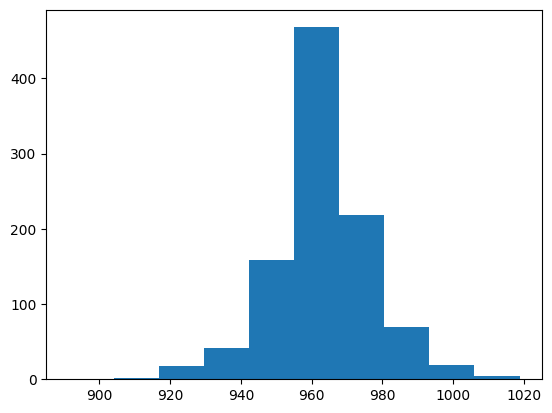

In [10]:
eps = .1    # the epsilon value for epsilon-DP
num_iter = 1000     # number of iterations to run the fcountLap mechanism
counts = [fcountLap(fcount, eps) for i in range(num_iter)]  # counts is a list of all the noisy counts returned by the fcountLap mechanism
plt.hist(counts)    # plot the histogram of counts

Observe that the histogram resembles the probability density function of the Laplace distribution.

In the following code block, we will plot the performance of the `fcountLap` method for a range of $\epsilon$'s.

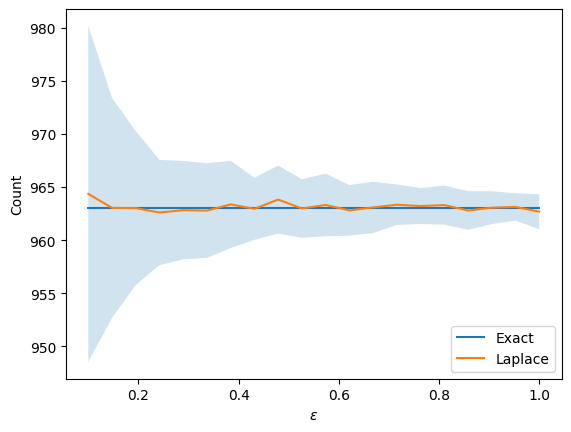

In [11]:
num_iter = 100                                  # number of iterations for each epsilon
eps_arr = np.linspace(0.1, 1.0, num=20)         # array of epsilons
noisy_counts_mean = np.zeros_like(eps_arr)      # array of the mean noisy counts returned by fcountLap. Intialized to all zeros
noisy_counts_std = np.zeros_like(eps_arr)       # array to store the standard deviations of the noisy counts
exact_counts = fcount*np.ones_like(eps_arr)     # array where each entry is equal to the exact count i.e. fcount

for i, eps in enumerate(eps_arr):
    counts = [fcountLap(fcount, eps) for i in range(num_iter)]
    noisy_counts_mean[i] = np.mean(counts)
    noisy_counts_std[i] = np.std(counts)
    
fig = plt.figure()
plt.plot(eps_arr, exact_counts, label='Exact')
plt.plot(eps_arr, noisy_counts_mean, label='Laplace')
plt.fill_between(eps_arr, noisy_counts_mean - noisy_counts_std, noisy_counts_mean + noisy_counts_std, alpha = 0.2)
plt.legend(loc="lower right")
plt.xlabel("$\epsilon$")
plt.ylabel("Count")
plt.show()

#### Observations

- Notice that the smaller $\epsilon$ is, the greater is the "spread" or the standard deviation of the noisy counts of `fcountLap`
- Notice that the mean of the noisy counts returned by `fcountLap` roughly equals the Exact count. This is because the Laplace noise is mean zero. In other words, the output of `fcountLap` is an unbiased estimate of `fcount`.

## Q1. Differentially Private Arg Max

In this question, you will implement various mechanisms for reporting the id of the maximum of a feature. Specifically, we will implement algorithms that report the id of the oldest person in the Statlog dataset. We begin by visualizing the histogram of ages.

<Axes: >

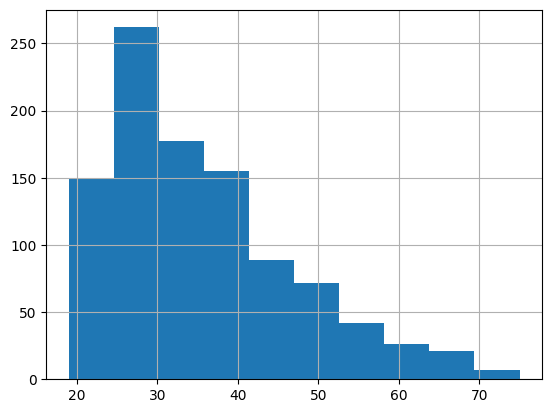

In [12]:
ages = data['age']

ages.hist()

### Q1.1 Arg Max

In the following code block, you will implement the `ReportMax` function that takes in an array and returns the index of the maximum of the array. If there are multiple indices for the maximum value, you may choose to return any one of them.

In [14]:
# Implement your function here

def ReportMax(x):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset
        
    Returns
    -------
    argmax : positive integer betwen 1 and n
        The index of the argmax of the array x
    '''
    n = x.size
    
    # TO COMPLETE
    
    max_age = max(x) # Find the maximum age 

    argmax = 0

    for index, item in enumerate(x): # For loop to find the index of the maximum value
      if item == max_age:
        argmax = index

    return argmax

# Test your function here

max_age = ReportMax(ages)
print(max_age)

536


### Q1.2 Noisy Max with Laplace Mechanism

In the following code block, you will implement the `ReportNoisyMax` function that is an $\epsilon$-DP mechanism for the `ReportMax` function above. The `ReportNoisyMax` function should implement the "Report Noisy Max" mechanism discussed in class. The mechanism adds i.i.d Laplace noise of scale $1/\epsilon$ to the entries of the array and reports the index of the maximum in the noisy array.  You can refer to Claim 3.9 of [Dwork & Roth, 2014](https://www.cis.upenn.edu/~aaroth/Papers/privacybook.pdf) for a proof of why the `ReportNoisyMax` mechanism is $\epsilon$-DP.

For generating Laplace noise, you can use `numpy.random.laplace` function.

In [63]:
# Implement your function here

from numpy.random import laplace as lp

def ReportNoisyMax(x, eps):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset

    eps : float (positive)
        epsilon budget for DP
        
    Returns
    -------
    argmax_lap : int (positive integer betwen 1 and n)
        An eps-DP private evaluation of the argmax
    '''    

    # TO COMPLETE

    argmax_lap = 0
    n = x.size

    noisy_array = x + lp(1/eps, size=n)
    argmax_lap = ReportMax(noisy_array)

    return argmax_lap

# Test your function here

eps = 0.1
ReportNoisyMax(ages,eps)

330

You can visualize the output of the `ReportNoisyMax` method by running the method several times and plotting the histogram of the ages corresponding to the indices returned. In the following code block, write code to run the `ReportNoisyMax` function `num_iter` number of times for each of the three $\epsilon$ in the `eps_arr` array. Then, plot histograms of the outputs for the counts returned by `ReportNoisyMax` for each $\epsilon$ separately.

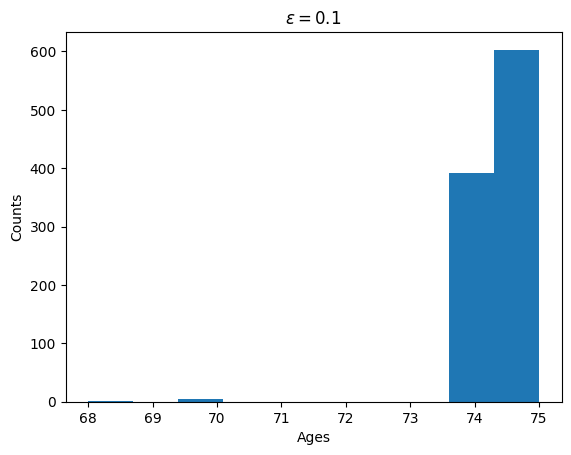

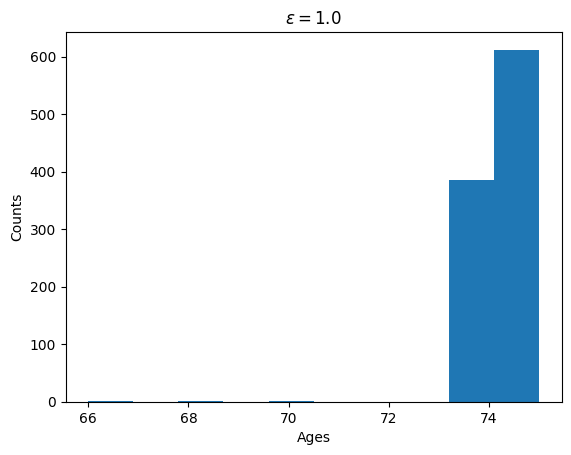

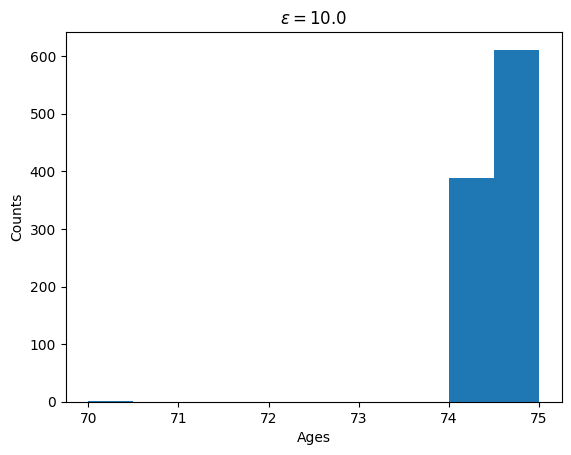

In [16]:
eps_arr = np.array([0.1, 1, 10])
num_iter = 1000

for eps in eps_arr:

   # TO COMPLETE
  max_lp = [ReportNoisyMax(ages, eps) for i in range(num_iter)]
  max_lp_age = []
  array_len = len(max_lp)
  for i in range(array_len):
   index_of_age = max_lp[i]
   max_lp_age.append(ages[index_of_age])

  plt.figure()
  plt.hist(max_lp_age)
  plt.title(r'$\epsilon = {}$'.format(eps))
  plt.xlabel('Ages')
  plt.ylabel('Counts')

State your observations from the above histograms below.

#### Observations

--SOLUTION--

We observe from the histograms that all the noisy ages are around 74 and 75.

In the following code block, you will plot the performance of the `ReportNoisyMax` method against a range of $\epsilon$'s. The method has higher performance if the age of the index it reports is close to the maximum age. Since the mechanism is random, we will compare the performance by taking the average age of the outputs over several runs.

Complete the following code block by plotting the performance of the `ReportNoisyMax` method with $\epsilon$ on the x-axis, and the mean-age of the returned `argmax_lap` on the y-axis. In addition to the mean-age, compute the standard deviation also for each $\epsilon$, and shade the region around the mean by a lighter color like how it was done for Q0.

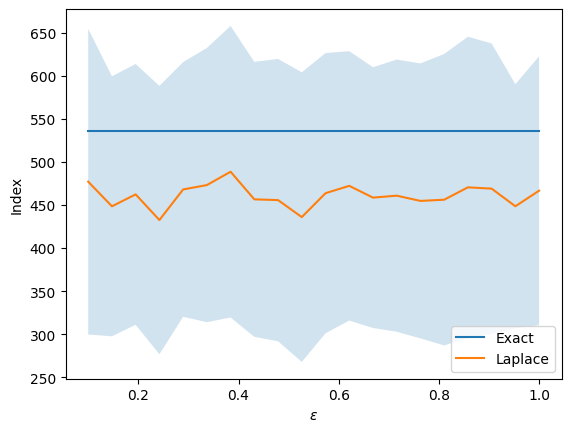

In [64]:
num_iter = 100                                  # number of iterations for each epsilon
eps_arr = np.linspace(0.1, 1.0, num=20)         # array of epsilons
noisy_max_mean = np.zeros_like(eps_arr)      # array of the mean noisy counts returned by fcountLap. Intialized to all zeros
noisy_max_std = np.zeros_like(eps_arr)       # array to store the standard deviations of the noisy counts
exact_max = max_age*np.ones_like(eps_arr)     # array where each entry is equal to the exact count i.e. fcount

for i, eps in enumerate(eps_arr):
    max_lp = [ReportNoisyMax(ages, eps) for i in range(num_iter)]
    noisy_max_mean[i] = np.mean(max_lp)
    noisy_max_std[i] = np.std(max_lp)
    
fig = plt.figure()
plt.plot(eps_arr, exact_max, label='Exact')
plt.plot(eps_arr, noisy_max_mean, label='Laplace')
plt.fill_between(eps_arr, noisy_max_mean - noisy_max_std, noisy_max_mean + noisy_max_std, alpha = 0.2)
plt.legend(loc="lower right")
plt.xlabel("$\epsilon$")
plt.ylabel("Index")
plt.show()

State your observations from the previous plot below.

#### Observations

--SOLUTION--

Since 

### Q1.3 Noisy Max with Exponential Mechanism

You will now implement a different mechanism for the `ReportMax` function. Let $n$ be the number of points in the dataset. You will now design an exponential mechanism that returns an index $y\in \{1, \ldots, n\}$ according to the following utility function. 

$u(x, y) = -\frac{|ReportMax(x) - x[y]|}{ReportMax(x)}$

From the definition of $u$, observe that the utility of $y$ is $0$ if the person with id $y$ indeed has the maximum age. If not, the utility is strictly negative. The farther the age of $y$ is to `max(ages)`, the lower is the utility.



Q. What is the sensitivity $\Delta_u$ of the utility function stated above? Please support your answer with appropriate reasoning.

A. --SOLUTION--

Q. Given an expression for the probability $\mathbb{P}(M_{exp}(x) == y)$ where $M_{exp}(x)$ is the output of an $\epsilon$-DP exponential mechanism using the above utility function, and $y\in \{1, \ldots, n\}$ is an element of the output set. Use $\LaTeX$ to state your formula precisely. 



A. --SOLUTION--
\begin{equation}
\mathbb{P}(M(x)=y)=\frac{\exp \left(\frac{u(x, y) \varepsilon}{2 \Delta_u}\right)}{\sum_{y^{\prime} \in \mathcal{Y}} \exp \left(\frac{u\left(x, y^{\prime}\right) \varepsilon}{2 \Delta_u}\right)}
\end{equation}


In the following code block, implement the `ReportMaxExp` function that implements an $\epsilon$-DP mechanism for returning the argmax using the exponential mechanism with the previously stated utility function.

To implement the exponential mechanism, you need to draw samples from the probability distribution over the index set $\{1, \ldots, n\}$ that you stated in your previous answer. You can use `random.choices` function to draw samples from this probability distribution.

In [66]:
import random      # import the random package to use the random.choices function

# Implement the function here

def ReportMaxExp(x, eps):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset

    eps : float (positive)
        epsilon budget for DP
        
    Returns
    -------
    argmax_exp : int (positive integer betwen 1 and n)
        An eps-DP private evaluation of the argmax
    '''    

    # TO COMPLETE

    n=x.size
    
    indices = np.arange(1,1001,1)   # An array of indices from 1 to 1000
    utility = []
   
    for i in range(n):
        utility.append(-(abs(x[ReportMax(x)]-x[i])/(x[ReportMax(x)])))   # Calculate the utility function

    # Calculate the exponential mechanism
    denom_total = 0
    for i in range(n):
        xy_prime = (utility[i] * eps)/4
        denom = np.exp(xy_prime)
        denom_total = denom_total + denom

    utility_numpy = np.array(utility)
    utility_mult = utility_numpy * eps / 4
    exp_utility_mult = np.exp(utility_mult)
    formula = np.divide(exp_utility_mult, denom_total)
    
    argmax_exp = 0
    argmax_exp = np.random.choice(indices, 1, p=formula)

    return argmax_exp

# Test the function here

eps = 1
argmax_exp = ReportMaxExp(ages, eps)
print(argmax_exp)

[58]


You can visualize the output of the `ReportMaxExp` method by running the method several times and plotting the histogram of the ages corresponding to the indices returned. In the following code block, write code to run the `ReportMaxExp` function `num_iter` number of times for each of the three $\epsilon$ in the `eps_arr` array. Then, plot histograms of the outputs for the counts returned by `ReportMaxExp` for each $\epsilon$ separately.

In [68]:
eps_arr = np.array([0.1, 1, 10])
num_iter = 1000

for eps in eps_arr:

   # TO COMPLETE
  max_lp = [ReportMaxExp(ages, eps) for i in range(num_iter)]
  max_lp_age = []
  array_len = len(max_lp)
  for i in range(array_len):
   index_of_age = max_lp[i]
   max_lp_age.append(ages[index_of_age])

  plt.figure()
  plt.hist(max_lp_age)
  plt.title(r'$\epsilon = {}$'.format(eps))
  plt.xlabel('Ages')
  plt.ylabel('Counts')

KeyError: "None of [Int64Index([1000], dtype='int64')] are in the [index]"

State your observations from the above histograms below.

#### Observations

--TO COMPLETE--

In the following code block, you will plot the performance of the `ReportMaxExp` method against a range of $\epsilon$'s. The method has higher performance if the age of the index it reports is close to the maximum age. Since the mechanism is random, we will compare the performance by taking the average age of the outputs over several runs.

Complete the following code block by plotting the performance of the `ReportMaxExp` method with $\epsilon$ on the x-axis, and the mean-age of the returned `argmax_exp` on the y-axis. In addition to the mean-age, compute the standard deviation also for each $\epsilon$, and shade the region around the mean by a lighter color like how it was done for Q0.

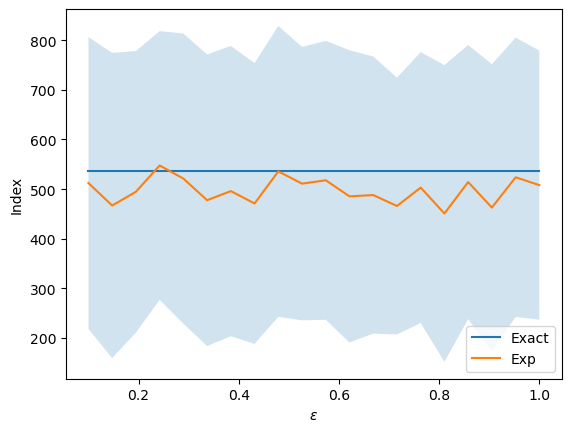

In [35]:
num_iter = 100                               
eps_arr = np.linspace(0.1, 1.0, num=20)      

# TO COMPLETE

noisy_max_mean_exp = np.zeros_like(eps_arr)      
noisy_max_std_exp = np.zeros_like(eps_arr)       
exact_max = max_age*np.ones_like(eps_arr)   
  
for i, eps in enumerate(eps_arr):

  # TO COMPLETE
  max_exp = [ReportMaxExp(ages, eps) for i in range (num_iter)]
  noisy_max_mean_exp[i] = np.mean(max_exp)
  noisy_max_std_exp[i] = np.std(max_exp)
  pass
    
fig = plt.figure()
plt.plot(eps_arr, exact_max, label='Exact')
plt.plot(eps_arr, noisy_max_mean_exp, label='Exp')
plt.fill_between(eps_arr, noisy_max_mean_exp - noisy_max_std_exp, noisy_max_mean_exp + noisy_max_std_exp, alpha = 0.2)
plt.legend(loc="lower right")
plt.xlabel("$\epsilon$")
plt.ylabel("Index")
plt.show()

State your observations from the previous plot below.

#### Observations

--TO COMPLETE--

### Q1.4 Noisy Max with Exponential Mechanism (Inverse Sensitivity)

You will now implement a third mechanism for the `ReportMax` function, this time using the Inverse Sensitivity Function (ISF) as the utility function. 

${ISF}(x, y) = -\max\{ k: \exists x' : d(x,x')=k ~\text{and}~ k\in \argmax(x') \}  $

Answer the following questions on the ISF utiity function defined above.

Q. What is the value of $ISF(x, \argmax(x))$ ?

A. --SOLUTION--

 $ISF(x, \argmax(x))$ = 0

Q. Suppose $n$ is the size of $x$. Let $n_{min}$ be the number of indices that attain the minimum in $x$. What is the value of $ISF(x, \argmin(x))$?

A. --SOLUTION--

$ISF(x, \argmin(x))$ = 1

In the following code block, implement a function that computes the above utility for $y\in \{1, \ldots, n\}$.

In [44]:
def ISF(x, y):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset

    y : int (positive integer betwen 1 and n)
        index variable
        
    Returns
    -------
    sens : int (positive integer betwen 1 and n)
        Inverse Sensitivity Function of database x for output y
    '''   
    
    # TO COMPLETE
    sens = 0
    value = x[y]
    report_max_index = ReportMax(x)
    report_max_value = ages[report_max_index]
    if(value == report_max_value):
        sens = 1
    else:
        sens = 0
    
    return sens


In the following code block, test the correctness of the above function by checking that it computes the correct values for $ISF(x, \argmax(x))$ and $ISF(x, \argmin(x))$.

In [43]:
isf_argmax = 0 # set this value to your answer for ISF(x, argmax(x))
isf_argmin = 1  # set this value to your answer for ISF(x, argmin(x))

print(ISF(ages, np.argmin(ages)) == isf_argmax)
print(ISF(ages, np.argmax(ages)) == isf_argmin)

True
True


In the following code block, implement the `ReportMaxExpISF` function that employs the exponential mechanism for reporting noisy max using the negative of the ISF as the utility.

In [61]:
# Implement your function here

def ReportMaxExpISF(x, eps):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset

    eps : float (positive)
        epsilon budget for DP
        
    Returns
    -------
    argmax_expISF : int (positive integer betwen 1 and n)
        An eps-DP private evaluation of the argmax
    '''         


    # TO COMPLETE
    indices = np.arange(1,1001,1)   # An array of indices from 1 to 1000
    n = x.size
    argmax_expISF = 0
    utility = []
    for i in range(n):
        utility.append(ISF(ages,i))

    denom_total = 0
    for i in range(n):
        xy_prime = (utility[i] * eps)/4
        denom = np.exp(xy_prime)
        denom_total = denom_total + denom

    utility_numpy = np.array(utility)
    utility_mult = utility_numpy * eps / 4
    exp_utility_mult = np.exp(utility_mult)
    formula = np.divide(exp_utility_mult, denom_total)
    #print(formula)

    argmax_expISF = 0
    argmax_expISF = np.random.choice(indices, 1, p=formula)[0]

    return argmax_expISF

# Test your function here

eps = 1
ReportMaxExpISF(ages, eps)


265

You can visualize the output of the `ReportMaxExpISF` method by running the method several times and plotting the histogram of the ages corresponding to the indices returned. In the following code block, write code to run the `ReportMaxExpISF` function `num_iter` number of times for each of the three $\epsilon$ in the `eps_arr` array. Then, plot histograms of the outputs for the counts returned by `ReportMaxExpISF` for each $\epsilon$ separately.

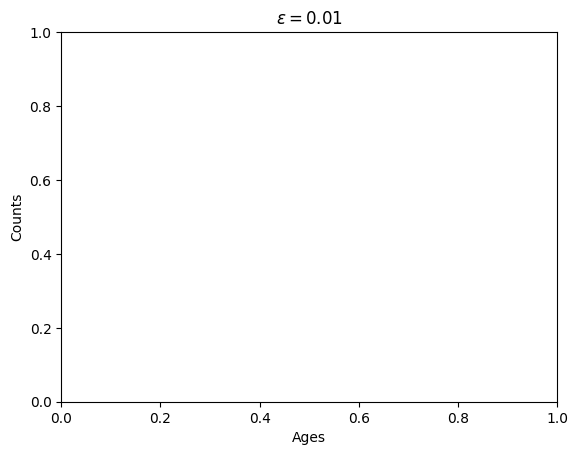

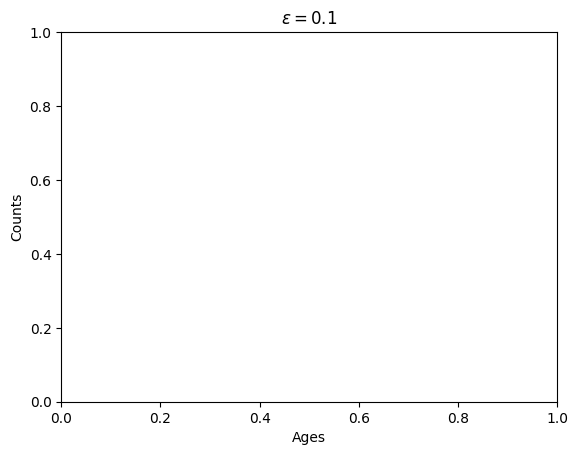

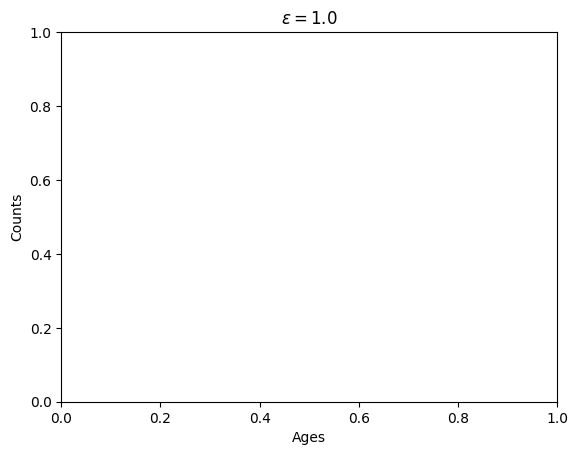

In [62]:
eps_arr = np.array([.01, .1, 1])
num_iter = 20

for eps in eps_arr:
    # TO COMPLETE
    plt.figure()
    plt.xlabel('Ages')
    plt.ylabel('Counts')
    plt.title(r'$\epsilon = {}$'.format(eps))

Complete the following code block by plotting the performance of the `ReportMaxExpISF` method with $\epsilon$ on the x-axis, and the mean-age of the returned `argmax_exp` on the y-axis. In addition to the mean-age, compute the standard deviation also for each $\epsilon$, and shade the region around the mean by a lighter color like how it was done for Q0.

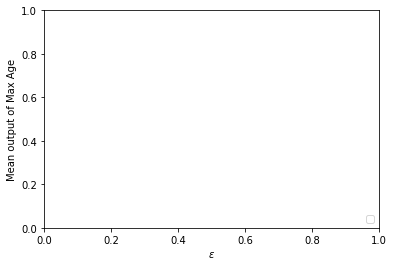

In [ ]:
num_iter = 20
eps_arr = np.linspace(.1, 1, num=5)

# TO COMPLETE

for i, eps in enumerate(eps_arr):
    # TO COMPLETE
    pass
    
fig = plt.figure()

# TO COMPLETE

plt.legend(loc="lower right")
plt.xlabel("$\epsilon$")
plt.ylabel("Mean output of Max Age")
plt.show()

Answer the following questions.

Q. In what order would you rank the three mechanisms `ReportNoisyMax`, `ReportMaxExp` and `ReportMaxExpISF` in terms of running time? Justify your answer with appropriate mathematical reasoning.

A. --TO COMPLETE--

Q. In what order would you rank the three mechanisms `ReportNoisyMax`, `ReportMaxExp` and `ReportMaxExpISF` in terms of performance? Justify your answer with appropriate reasoning.

A. --TO COMPLETE--

## Q2. Differentially Private Simple Linear Regression

For this question, you will implement differentially private mechanisms for simple linear regression with `duration` as the regressor $x$ and `credit amount` as the target $y$. Given $\{(x_i,y_i)\}_{i=1}^n$, the task is to find the parameters $(\beta_0, \beta_1)$ to fit the following linear model,

$y = \beta_0 x + \beta_1$.

Let $X$ denote the $n\times 2$ matrix whose first column is composed of $x_1, \ldots, x_n$ and second column composed of all ones. Let $\beta = [\beta_0 \ \beta_1]^T$. Recall that the ordinary least squares (OLS) solution to the problem is the following.

$$
\hat{\beta}_{OLS} = (X^TX)^{-1}X^Ty
=   \begin{bmatrix} 
    \sum_i x_i^2 & \sum_i x_i\\
    \sum_i x_i & n
    \end{bmatrix}^{-1}
    \begin{bmatrix} 
    \sum_i x_iy_i\\
    \sum_i y_i
    \end{bmatrix}
$$.


### Q2.1 Linear Regression with OLS

In the following code block, implement the function `LinReg` that computes $\beta$ using the OLS formula above.

In [18]:
def LinReg(x,y):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset of regressor

    y : array of shape (n, 1) for some integer n
        Public dataset of target
        
    Returns
    -------
    beta_ols : array of shape (2, 1)
        OLS solution to linear regression with data (x,y)
        beta_ols[0] is the slope
        beta_ols[1] is the y-intercept
        The model is y = beta_ols[0]*x + beta_ols[1]
    '''       

    # TO COMPLETE
    
    n=x.size
    X = [] # Defining an empty array X

    # Adding the elements of x to the first column of X and 1 to the second column of X
    for i in range(n):
      X.append([x[i],1])

    X_numpy = np.array(X)
    X_product = np.dot(X_numpy.transpose(), X_numpy)
    X_inverse = np.linalg.inv(X_product)
    X_inverse_X_transpose = np.dot(X_inverse, X_numpy.transpose())
    beta_ols = np.dot(X_inverse_X_transpose,y)
    return beta_ols

In the following code block, test the `LinReg` function with x as the vector of ages and y as the vector of credit amounts. visualize the output of `LinReg` by plotting $(x,y)$ on a scatter plot and then plotting the predictions $\hat{y} = \hat{\beta}_0 x + \hat{\beta}_1$, where $\hat{\beta}$ is the output of `LinReg(x,y)`.

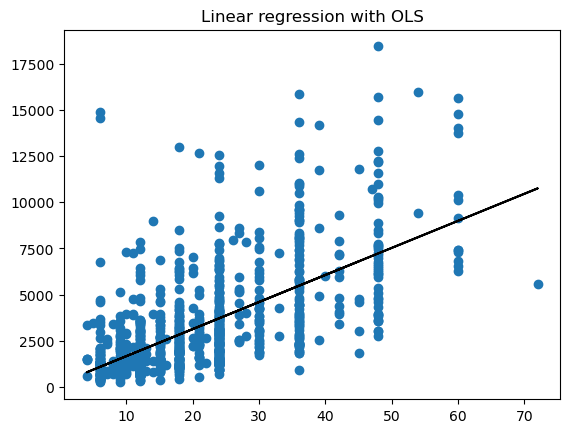

In [35]:
x = np.array(data['duration'])
y = np.array(data['credit_amount']) 

beta_ols = np.zeros((2,1)) # TO COMPLETE
beta_ols = LinReg(x,y)
yhat_ols = beta_ols[0]*x + beta_ols[1]  # TO COMPLETE

plt.scatter(x,y)
plt.plot(x, yhat_ols, color='k')
plt.title('Linear regression with OLS')
plt.show()

### Q2.2 Linear Regression with Laplace Mechanism

from now on, we sssume that $x_i \in [0, B_x]$ and $y_i \in [0, B_y]$. 

Q. Give the expressions for the sensitivity of each of the four terms that appear in the OLS formula for $\hat{\beta}$ --- $\sum_i x_i^2, \sum_i x_i, \sum_i x_i y_i$ and $\sum_i y_i$ in terms of $B_x$ and $B_y$.

A. --TO COMPLETE--


You will now implement a $\epsilon$-DP mechanism for estimating $\hat{\beta}$ from $\{(x_i,y_i)\}_{i=1}^n$, using the following strategy.

1. Split the privacy budget $\epsilon$ into four parts
2. Use the Laplace mechanism with appropriate privacy budgets to estimate the four quantities  $\sum_i x_i^2, \sum_i x_i, \sum_i x_i y_i$ and $\sum_i y_i$. For this step, you will use the sensitivity of the quantities that you derived above, in order to set the apropriate scaling for the Laplace noise. 
3. Compute $\hat{\beta}_{Lap}$ using the private estimats of  $\sum_i x_i^2, \sum_i x_i, \sum_i x_i y_i$ and $\sum_i y_i$ in place of the exact quantities in the OLS formula for $\hat{\beta}$.

As preparation for implementing the above mechanism, in the following code block, implement a generic Laplace mechanism in the function `LapMech`. 

In [85]:
def LapMech(f, sens, eps):
    '''
    Parameters
    ----------
    f : float
        non-private query output

    sens : float
        Sensitivity of the query

    eps : float (positive)
        epsilon budget for DP
        
    Returns
    -------
    fpriv : float
        private query output
    '''    
    # TO COMPLETE

    fpriv = 0

    fpriv = f + np.random.laplace(loc=0, scale=sens/eps)

    return fpriv

In the following code block, implement the `LinRegLap` function that gives an $\epsilon$-DP mechanism for estimating $\hat{\beta}$ from $(x,y)$. In your code for `LinRegLap`, make use of the `LapMech` function to compute $\sum_i x_i^2, \sum_i x_i, \sum_i x_i y_i$ and $\sum_i y_i$ privately. Using these, compute $\hat{\beta}_{Lap}$.

In [86]:
def LinRegLap(x, y, Bx, By, eps):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset of regressor

    y : array of shape (n, 1) for some integer n
        Public dataset of target

    Bx : float
        Max value of x, i.e., x is in range [0, Bx]

    By : float
        Max value of y, i.e., y is in range [0, By]

    eps : float (positive)
        epsilon budget for DP        

    Returns
    -------
    beta_lap : array of shape (2, 1)
        Estimate of the linear regression parameter beta with data (x,y)
    '''      

    # TO COMPLETE

    beta_lap = np.zeros((2,1))

    split_eps = eps / 4
    sum_x_square =np.sum(x*2) + np.random.laplace(loc=0, scale= Bx*2/split_eps) 
    sum_x = np.sum(x) + np.random.laplace(loc=0, scale=Bx/split_eps) 
    sum_x_y = np.sum(x*y) + np.random.laplace(loc=0, scale=Bx*By/split_eps)
    sum_y = np.sum(y) + np.random.laplace(loc=0, scale=By/split_eps)
    
    return beta_lap

In the following code block, test the `LinRegLap` function with x as the vector of durations and y as the vector of credit amounts. visualize the output of `LinRegLap` by plotting $(x,y)$ on a scatter plot and then plotting the predictions $\hat{y} = \hat{\beta}_1 x + \hat{\beta}_0$. In the same figure, also plot the predictions from $\hat{\beta}_{OLS}$. Label both the predictions with different colors and place a `legend` in the figure.

Use $B_x = 100$ (i.e. the maximum duration is 100 months) and $B_y = 20000$ (i.e. the maximum credit amount is 20,000).

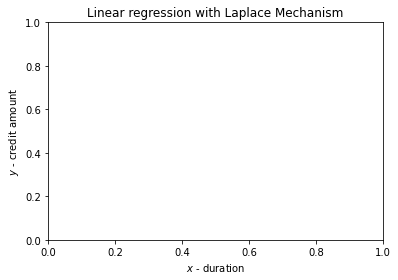

In [ ]:
Bx = 100
By = 20000
eps = 1

betaLap = np.zeros((2,1))   # TO COMPLETE
yhatLap = y*0   # TO COMPLETE


plt.xlabel(r'$x$ - duration')
plt.ylabel(r'$y$ - credit amount')
plt.title('Linear regression with Laplace Mechanism')
plt.show()

Q. Redo the above code block with different values of $\epsilon$. State your observations below.

A. --TO COMPLETE--

To measure the performance of the mechanism `LinRegLap`, we compute the root mean squared error (RMSE) averaged over multiple runs of the mechanism. The RMSE between the true target vector $y$ and predicted target vector $\hat{y}$ is given by,

$RMSE(y, \hat{y}) = \sqrt{\frac{1}{n}(y - \hat{y})^2}$.

In the following code block, implement the function `rmse` to compute the MSE.

In [ ]:
def rmse(y, yhat):
    '''
    Parameters
    ----------
    y : array of shape (n, 1) for some integer n
        Public dataset of target

    yhat : array of shape (n, 1) for some integer n
        Predictions for target    

    Returns
    -------
    val_rmse : float
        Value of the RMSE
    '''  
    
    # TO COMPLETE

    val_rmse = 0

    return val_rmse


In the following code block, compute the RMSE of the OLS prediction using the `rmse` function you implemented above.

In [ ]:
rmse_ols = rmse(y, yhat_ols)

print('The RMSE of OLS is {}.'.format(rmse_ols))

The RMSE of OLS is 0.


In the following code block, you will plot the performance of the `LinRegLap` method against a range of $\epsilon$'s. The performance is measured using the RMSE value between its predictions and true targets. The method has higher performance if RMSE is low. Since the mechanism is random, we will compare the performance by taking the **median** RMSE (not the mean) over several runs. You can compute the median of an array using `np.median` method.

Complete the following code block by plotting the performace of the `LinRegLap` method with $\epsilon$ on the x-axis, and median RMSE on the y-axis. As a baseline, plot the RMSE of the OLS prediction in the same figure. This should be a horizontal line because the RMSE of OLS prediction does not vary with $\epsilon$.

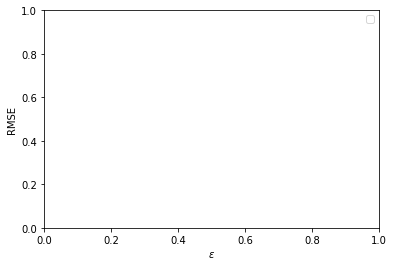

In [ ]:
num_iter = 1000
eps_arr = np.linspace(1, 5, num=10)

# TO COMPLETE

for i, eps in enumerate(eps_arr):
    for j in range(num_iter):
        # TO COMPLETE
        pass

fig = plt.figure()
# TO COMPLETE
plt.legend(loc="upper right")
plt.xlabel("$\epsilon$")
plt.ylabel("RMSE")
plt.show()



State your observations from the previous plot below. For example, discuss why the RMSE for $\hat{\beta}_{Lap}$ could be very large for small values of $\epsilon$. Does the RMSE for $\hat{\beta}_{Lap}$ reach the level of RMSE for $\hat{\beta}_{OLS}$ for large $\epsilon$, or is there always a gap between the two, and if so, why? 

#### Observations

--TO COMPLETE--

Q. Using the post-processing property and composition of DP, argue why `LinRegLap` is $\epsilon$-DP.

A. --TO COMPLETE--

### Q2.3 Linear Regression with Gradient Descent

For this question, you will estimate $\hat{\beta}$ for linear regression using gradient descent. Recall that in gradient descent, we start from an arbitraty initialization $\hat{\beta}_0$ for $\hat{\beta}$ and update $\hat{\beta}$ using the following equation.

$\hat{\beta}_{t+1} = \hat{\beta}_t - \alpha \nabla L(\hat{\beta}_t)$,

where $t$ is the iteration number running from $1$ to $T$ (maximum number of gradient steps), $\alpha$ is the step-size and $\nabla L(\hat{\beta}_t)$ is the gradient of the loss evaluated at $\hat{\beta}_t$. For this question, we will use the mean squared loss function. That is,

$L(\beta) = \frac{1}{n} \sum_{i=1}^n (y_i - (\beta_0 x + \beta_1))^2$.

The gradient of loss is given by,

$$\nabla L(\beta) = 
    \begin{bmatrix} 
    \frac{\partial L(\beta)}{\partial \beta_0}\\
    \frac{\partial L(\beta)}{\partial \beta_1}
    \end{bmatrix}
$$

Q. Write the expressions for $\frac{\partial L(\beta)}{\partial \beta_0}$ and $\frac{\partial L(\beta)}{\partial \beta_1}$ in terms of $\{(x_i, y_i)\}_{i=1}^n$.

A. --TO COMPLETE--

In the following code block, implement the function `LinRegGD` that computes $\beta$ using gradient descent.

In [ ]:
def LinRegGD(x,y, step_size, num_steps):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset of regressor

    y : array of shape (n, 1) for some integer n
        Public dataset of target

    step_size : float (positive)
        Step size for gradient descent

    num_steps : int (positive)
        Number of gradient steps for gradient descent
        
    Returns
    -------
    beta_list : list of length num_steps, where each element is an array of shape (2, 1)
        beta_list[t] is the estimate beta at step t
        beta_list[t][0] is the slope
        beta_list[t][1] is the y-intercept
    '''      

    n = y.size
    beta = np.zeros((2,1))
    beta_list = [beta]

    for i in range(num_steps):
        # TO COMPLETE
        pass

    return beta_list

In the following code block, test the `LinRegGD` function on scaled and centered data $(xs, ys)$ of $(x,y)$. Note that `LinRegGD` returns a list of $\hat{\beta}_t$ for each step $t$ of the gradient descent. Plot the RMSE of each of the $\{\hat{\beta}_t\}_{t=1}^T$ as a function of $t$. Also plot $\| \hat{\beta}_t - \hat{\beta}_{OLS}\|_2$ as a function of $t$. To compute $\|\cdot\|_2$, use `np.linalg.norm`.

Text(0, 0.5, '$||\\beta_t - \\beta_{OLS}||_2$')

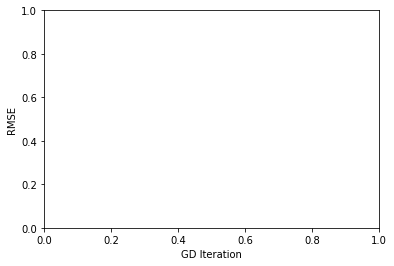

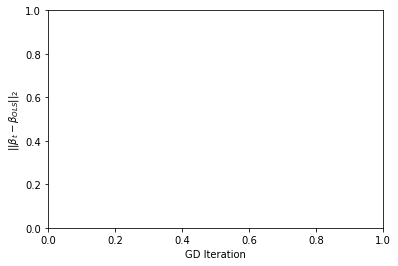

In [ ]:
num_steps = 10
step_size = 20

# load the data

x = np.array(data['duration']).reshape(-1, 1)
y = np.array(data['credit_amount']).reshape(-1, 1)

# scale the data using Bx and By

xs = x/Bx
ys = y/By

# center the data by subtracting out the mean

xs = xs - np.mean(xs)
ys = ys - np.mean(ys)

# TO COMPLETE

for i in range(num_steps):
    # TO COMPLETE
    pass

plt.figure()
# TO COMPLETE
plt.xlabel('GD Iteration')
plt.ylabel('RMSE')

plt.figure()
# TO COMPLETE
plt.xlabel('GD Iteration')
plt.ylabel(r'$||\beta_t - \beta_{OLS}||_2$')

### Q2.4 Linear Regression with Differentially Private Gradient Descent (DPGD)

For this question, you will implement an $\epsilon$-DP mechanism for estimating $\hat{\beta}$ of the scaled and centered data $(xs, ys)$ used previously. 

Q. Note that $xs_i, ys_i \in [-1, 1]$. Assume that $\hat{\beta}_0, \hat{\beta}_1 \in [-1,1]$. Recall the expressions for $\frac{\partial L(\beta)}{\partial \beta_0}$ and $\frac{\partial L(\beta)}{\partial \beta_1}$ in terms of $\{(xs_i, ys_i)\}_{i=1}^n$. Combining these facts, state the sensitivity of $\frac{\partial L(\beta)}{\partial \beta_0}$ and $\frac{\partial L(\beta)}{\partial \beta_1}$ in terms of $n$.

A. --TO COMPLETE--

Q. Using the formula for the sensitivity of $\frac{\partial L(\beta)}{\partial \beta_0}$ and $\frac{\partial L(\beta)}{\partial \beta_1}$ from the previous answer, determine what scale of Laplace noise should be added to the gradient in each of the $T$ steps of gradient descent so as to make the overall noisy GD satisfy $\epsilon$-DP. Your answer should be in terms of $n$, $\epsilon$ and $T$.

A. --TO COMPLETE--

In the following code block, complete the `LinRegDPGD` function that implements $\epsilon$-DP mechanism for estimating $\hat{\beta}$ using the DPGD algorithm.

In [ ]:
def LinRegDPGD(x,y, step_size, num_steps, eps):
    '''
    Parameters
    ----------
    x : array of shape (n, 1) for some integer n
        Public dataset of regressor

    y : array of shape (n, 1) for some integer n
        Public dataset of target

    step_size : float (positive)
        Step size for gradient descent

    num_steps : int (positive)
        Number of gradient steps for gradient descent

    eps : float (positive)
        epsilon budget for DP            
        
    Returns
    -------
    beta_list : list of length num_steps, where each element is an array of shape (2, 1)
        beta_list[t] is the DP estimate beta at step t
        beta_list[t][0] is the slope
        beta_list[t][1] is the y-intercept
    '''      

    n = y.size
    beta = np.zeros((2,1))
    beta_list = [beta]

    # TO COMPLETE

    for i in range(num_steps):
        # TO COMPLETE
        pass

    return beta_list

In the following code block, test the `LinRegDPGD` function on scaled and centered data $(xs, ys)$ of $(x,y)$. Note that `LinRegDPGD` returns a list of $\hat{\beta}_t$ for each step $t$ of the gradient descent. Plot the RMSE of each of the $\{\hat{\beta}_t\}_{t=1}^T$ as a function of $t$. Also plot $\| \hat{\beta}_t - \hat{\beta}_{OLS}\|_2$ as a function of $t$. To compute $\|\cdot\|_2$, use `np.linalg.norm`.

Text(0, 0.5, '$||\\beta_t - \\beta_{OLS}||_2$')

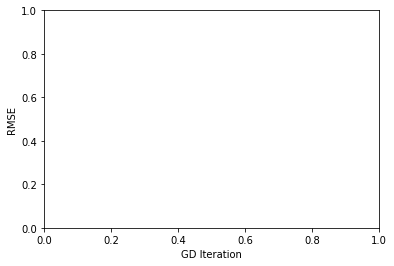

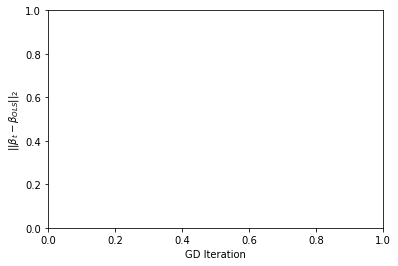

In [ ]:
eps = 5

num_steps = 10
step_size = 1

# TO COMPLETE

for i in range(num_steps):
    # TO COMPLETE
    pass

plt.figure()
# TO COMPLETE
plt.xlabel('GD Iteration')
plt.ylabel('RMSE')

plt.figure()
# TO COMPLETE
plt.xlabel('GD Iteration')
plt.ylabel(r'$||\beta_t - \beta_{OLS}||_2$')

In the following code block, you will plot the performance of the `LinRegDPGD` method against a range of $\epsilon$'s. The performance is measured using the RMSE value between its predictions and true targets. The method has higher performance if RMSE is low. Since the mechanism is random, we will compare the performance by taking the **median** RMSE (not the mean) over several runs. You can compute the median of an array using `np.median` method.

Complete the following code block by plotting the performace of the `LinRegDPGD` method with $\epsilon$ on the x-axis, and median RMSE on the y-axis. As a baseline, plot the RMSE of the OLS prediction in the same figure. This should be a horizontal line because the RMSE of OLS prediction does not vary with $\epsilon$. As a second baseline, plot the RMSE of the `LinRegGD` in the same figure. This should also be a horizontal line because the RMSE of OLS prediction does not vary with $\epsilon$.

For the next code block, use the scaled and centered data $(xs, ys)$ (instead of $(x, y)$) computed in a previous code plot with all three methods `LinReg`, `LinRegGD` and `LinRegDPGD`

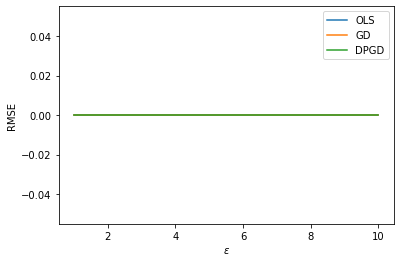

In [ ]:
beta_ols = LinReg(xs,ys)
# TO COMPLETE
rmse_ols = np.zeros_like(eps_arr)

num_steps = 10
step_size = 10

beta_gd = LinRegGD(xs,ys, step_size, num_steps)[-1]
# TO COMPLETE
rmse_gd = np.zeros_like(eps_arr)


num_iter = 100
eps_arr = np.linspace(1, 10, num=10)
# TO COMPLETE
rmse_dpgd = np.zeros((eps_arr.size, num_iter))


num_steps = 10
step_size = 1

for i, eps in enumerate(eps_arr):
    for j in range(num_iter):
        # TO COMPLETE
        pass

fig = plt.figure()
plt.plot(eps_arr, rmse_ols, label='OLS')
plt.plot(eps_arr, rmse_gd, label='GD')
plt.plot(eps_arr, np.median(rmse_dpgd, axis=1), label='DPGD')
plt.legend(loc="upper right")
plt.xlabel("$\epsilon$")
plt.ylabel("RMSE")
plt.show()

State your observations from the previous plot below. 

#### Observations

--TO COMPLETE--

## Declaration

I declare that this assignment is my original work and that I have not plagiarized or used any unauthorized resources in completing it. By submitting this assignment, I confirm my understanding of the academic integrity policies of this institution.

**Name:**  --PLEASE ENTER YOUR NAME--